# Setup

In [ ]:
import gymnasium as gym
import babybot01_env
from tqdm import tqdm
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback, CallbackList
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from stable_baselines3.common.monitor import Monitor


name = 'ppo_spidy_v3_2'
env_id = "Spidy-v3"
n_steps = 1200
n_envs = 1

policy = 'MlpPolicy'
tensorboard_log = f"./{name}/t_logs/"
path = f"./{name}/model/{name}"
log_path = f"./{name}/logs/"
device = 'cpu'

def make_env(render_mode:str=None):
    e = gym.make(env_id, render_mode=render_mode)
    return e

# Test Env

pybullet build time: Nov 28 2023 23:45:17


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Intel
GL_RENDERER=Mesa Intel(R) UHD Graphics 620 (KBL GT2)
GL_VERSION=4.6 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
GL_SHADING_LANGUAGE_VERSION=4.60
pthread_getconcurrency()=0
Version = 4.6 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Vendor = Intel
Renderer = Mesa Intel(R) UHD Graphics 620 (KBL GT2)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Intel
Workaround for some crash in the Intel OpenGL driver on Linux/Ubuntu
ven = Intel
Workaround for some crash in the Intel OpenGL driver on Linux/Ubu

  0%|          | 0/1 [00:00<?, ?it/s]/home/dorvan/Documents/dorvan/Babydoll/Produits/Babybot-01/Informatic-01/venv/hostEnv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:130: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/home/dorvan/Documents/dorvan/Babydoll/Produits/Babybot-01/Informatic-01/venv/hostEnv/lib/python3.10/site-packages/gymnasium/spaces/box.py:418: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")
/home/dorvan/Documents/dorvan/Babydoll/Produits/Babybot-01/Informatic-01/venv/hostEnv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:130: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(


[array([[0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]]), array([[0.  , 0.75, 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.75, 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.5 , 0.  , 0.  , 0.75, 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.  , 0.5 , 0.75, 0.  , 0.  , 0.5 , 0.

100%|██████████| 1/1 [00:22<00:00, 22.78s/it]

[array([[0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]]), array([[0.  , 0.75, 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.75, 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.5 , 0.  , 0.  , 0.75, 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.  , 0.5 , 0.75, 0.  , 0.  , 0.5 , 0.

numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


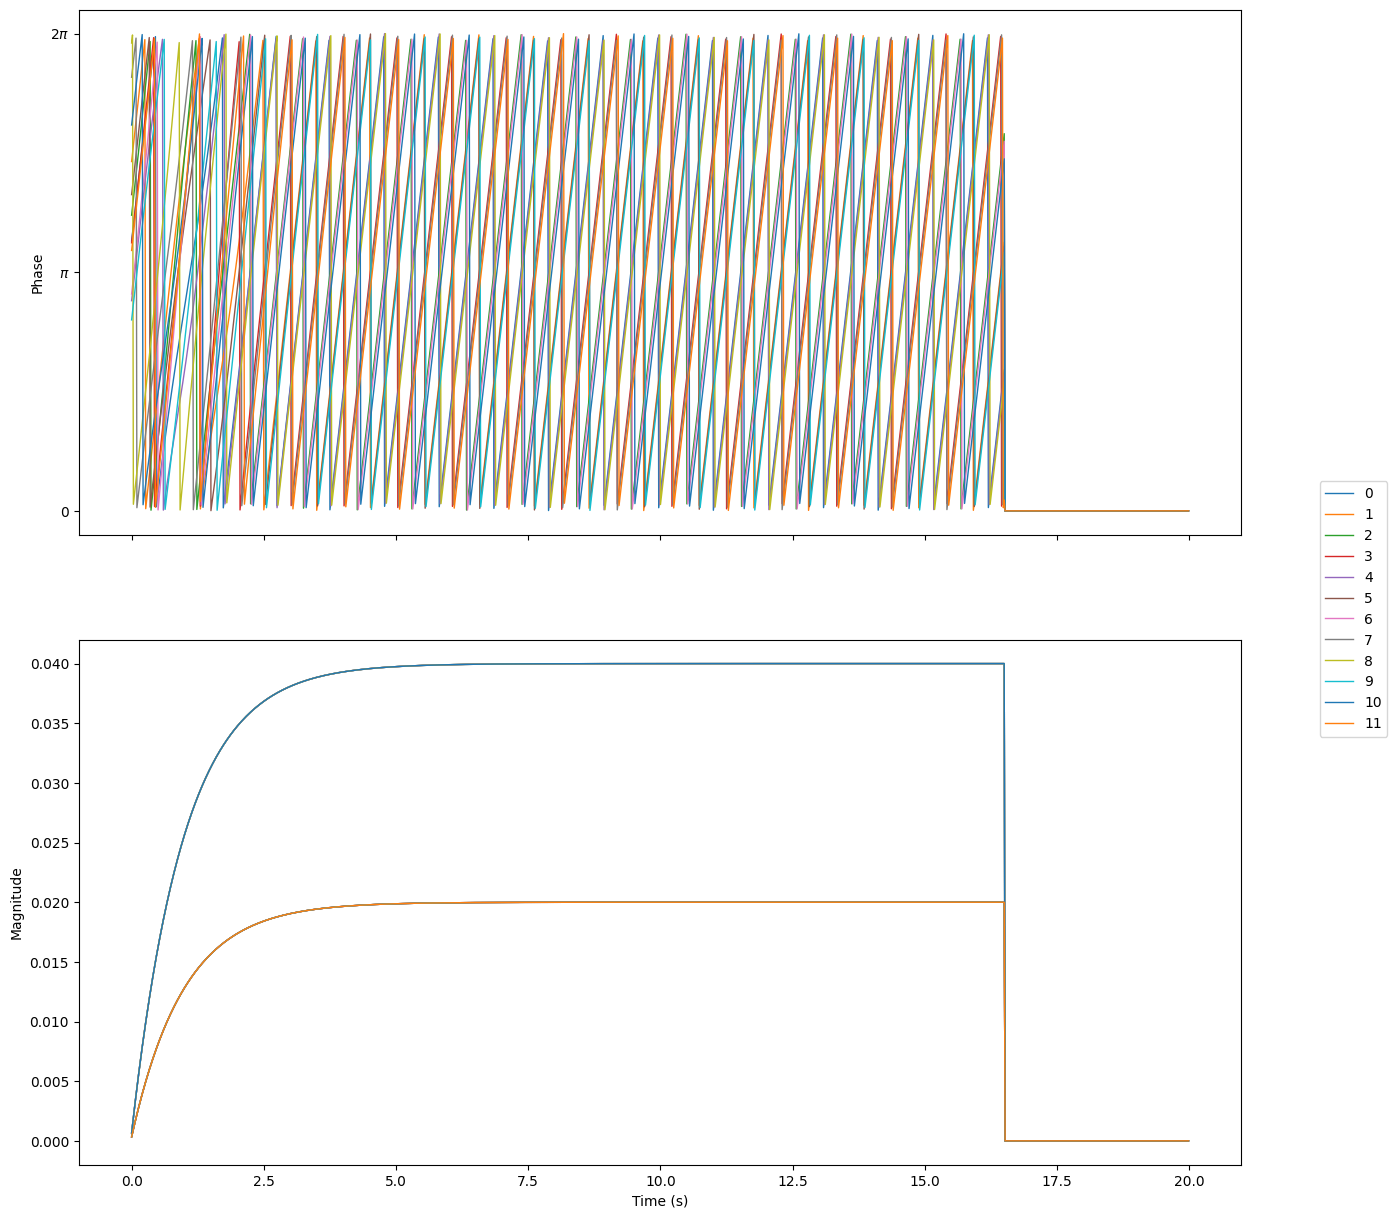

In [2]:

env = gym.make(env_id,max_episode_steps=n_steps, render_mode="human")

values_hist = np.empty((n_steps, 12))
phase_hist = np.empty((n_steps, 12))
magnitude_hist = np.empty((n_steps, 12))

for episode in tqdm(range(1)):

    done = False
    obs, info = env.reset()
    t=0
    while not done:

        xz = 270 / (360)
        mir = 180 / (360)
        action = [
            np.array(
        [
            [0,1,1,0,1,0,0,0,0,0,0,0],
            [1,0,0,1,0,1,0,0,0,0,0,0],
            [1,0,0,1,1,0,1,0,0,0,0,0],
            [0,1,1,0,0,1,0,1,0,0,0,0],
            [1,0,1,0,0,1,1,0,1,0,0,0],
            [0,1,0,1,1,0,0,1,0,1,0,0],
            [0,0,1,0,1,0,0,1,1,0,1,0],
            [0,0,0,1,0,1,1,0,0,1,0,1],
            [0,0,0,0,1,0,1,0,0,1,1,0],
            [0,0,0,0,0,1,0,1,1,0,0,1],
            [0,0,0,0,0,0,1,0,1,1,0,1],
            [0,0,0,0,0,0,0,1,0,0,1,0],
        ]),
        

        
            np.array(
                [
                    [0,xz,mir,0,0,0,0,0,0,0,0,0],
                    [xz,0,0,mir,0,0,0,0,0,0,0,0],
                    [mir,0,0,xz,mir,0,0,0,0,0,0,0],
                    [0,mir,xz,0,0,mir,0,0,0,0,0,0],
                    [0,0,mir,0,0,xz,mir,0,0,0,0,0],
                    [0,0,0,mir,xz,0,0,mir,0,0,0,0],
                    [0,0,0,0,mir,0,0,xz,mir,0,0,0],
                    [0,0,0,0,0,mir,xz,0,0,mir,0,0],
                    [0,0,0,0,0,0,mir,0,0,xz,mir,0],
                    [0,0,0,0,0,0,0,mir,xz,0,0,mir],
                    [0,0,0,0,0,0,0,0,mir,0,0,xz],
                    [0,0,0,0,0,0,0,0,0,mir,xz,0],
                ]
            )
        ]
        obs, reward, terminate, trunc, info = env.step(action)
        print(obs)
        
        phase_hist[t, :] = info['curr_phases']
        magnitude_hist[t, :] = info['curr_magnitudes']
        #print("obs: "+str(obs[2]))
        
        #print("reward: "+str(reward))

        if terminate or trunc:
            done = True

        t+=1


output_dir = Path("./outputs/cpg_controller")
output_dir.mkdir(exist_ok=True, parents=True)

fig, axs = plt.subplots(2, 1, figsize=(15, 15), sharex=True)
t = np.arange(n_steps) * 1./60.
legend = range(12)
axs[0].plot(t, phase_hist , linewidth=1, label=legend)
axs[0].set_yticks([0, np.pi, 2 * np.pi])
axs[0].set_yticklabels(["0", r"$\pi$", r"$2\pi$"])
axs[0].set_ylabel("Phase")
axs[1].plot(t, magnitude_hist, linewidth=1)
axs[1].set_ylabel("Magnitude")
axs[1].set_xlabel("Time (s)")
# axs[2].plot(t, values_hist, linewidth=1)
# axs[2].set_yticks([-1, 0, 1])
# axs[2].set_yticklabels(["-1", r"0", r"1"])
# axs[2].set_ylabel("Value")
# axs[2].set_xlabel("Time (s)")
fig.legend(loc=7)
fig.savefig(output_dir / "simple_cpg_rollout.png")
env.close()

# Create agent

In [ ]:
train_env = gym.make(env_id, render_mode="rgb_array", max_episode_steps=1000)

model = PPO(policy, train_env, batch_size = 60, verbose=1, n_steps=n_steps, tensorboard_log=tensorboard_log)

#model.save(path)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


# Train

In [ ]:
class InfoCallback(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)

    def _on_step(self) -> bool:
        # Access the training environment's 'step_info' attribute
        
        info = self.locals['infos']
        info = info[0]

        self.logger.record("rewards/distance_reward", info["distance_reward"])
        self.logger.record("rewards/last_ep_mean_rew", info["last_ep_mean_rew"])

        return True
            
train_env = Monitor(make_env())
eval_env = make_env()

eval_callback = EvalCallback(eval_env,
                             log_path=log_path, eval_freq=1e5,
                             deterministic=True, render=False)

class SaveOnStep(BaseCallback):
    def __init__(self, steps: int, path: str):
        super().__init__()
        self.steps = steps
        self.save_path = path

    def _on_step(self) -> bool:
        # Check if the current step matches the saving frequency
        if self.n_calls % self.steps == 0:
            # Save model with the current timestep in the filename

            print(f"Saving model at step {self.n_calls} to {self.save_path}")
            self.model.save(self.save_path)
        return True
    
callbacks = [SaveOnStep(1e5, path), InfoCallback(), eval_callback]

model = PPO.load(path,train_env ,device=device)

model.learn(total_timesteps=1e7, progress_bar=True, callback=callbacks, reset_num_timesteps=False)

model.save(path)

train_env.close()


# Display

In [2]:

test_env = gym.make(env_id,max_episode_steps=n_steps, render_mode="human", )
model = PPO.load(path)
info = {}

for episode in range(1):

    done = False
    obs, info = test_env.reset()
    for t in range(n_steps):

        action = model.predict(obs)[0]
        
        obs, reward, terminate, trunc, info = test_env.step(action)
    
        if terminate or trunc:
            break

        

test_env.close()




pybullet build time: Nov 28 2023 23:45:17


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Intel
GL_RENDERER=Mesa Intel(R) UHD Graphics 620 (KBL GT2)
GL_VERSION=4.6 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
GL_SHADING_LANGUAGE_VERSION=4.60
pthread_getconcurrency()=0
Version = 4.6 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Vendor = Intel
Renderer = Mesa Intel(R) UHD Graphics 620 (KBL GT2)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Intel
Workaround for some crash in the Intel OpenGL driver on Linux/Ubuntu
ven = Intel
Workaround for some crash in the Intel OpenGL driver on Linux/Ubu

/home/dorvan/Documents/dorvan/Babydoll/Produits/Babybot-01/Informatic-01/venv/hostEnv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:130: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/home/dorvan/Documents/dorvan/Babydoll/Produits/Babybot-01/Informatic-01/venv/hostEnv/lib/python3.10/site-packages/gymnasium/spaces/box.py:418: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")
/home/dorvan/Documents/dorvan/Babydoll/Produits/Babybot-01/Informatic-01/venv/hostEnv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:130: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
X connection to :0 broken (explicit kill or server shutdown).


: 

In [ ]:
# Show CPG parameters
coupling_weights = info['coupling_weights']
phase_biases= info['phase_biases']



fig, axs = plt.subplots(2,1, figsize=(12, 6))  # Adjust size if needed

im1 = axs[0].imshow(coupling_weights, cmap='viridis', aspect='equal')
fig.colorbar(im1, ax=axs[0], orientation='vertical')  # Add a color bar for reference
axs[0].set_title("coupling_weights")
axs[0].set_xlabel("Column Index")
axs[0].set_ylabel("Row Index")
axs[0].set_xticks(range(12))
axs[0].set_yticks(range(12))

im2 = axs[1].imshow(phase_biases, cmap='viridis', aspect='equal')
fig.colorbar(im1, ax=axs[1], orientation='vertical')  # Add a color bar for reference
axs[1].set_title("phase_biases")
axs[1].set_xlabel("Column Index")
axs[1].set_ylabel("Row Index")
axs[1].set_xticks(range(12))
axs[1].set_yticks(range(12))


plt.tight_layout()
plt.show()